# AD450 Final Exam
### Brandan Owens and Loan Pham

## Q.1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from scipy import io


In [2]:
# q.1.a Read in the dataset “kc_house_data.csv”
df = pd.read_csv("../dataFiles/kc_house_data.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


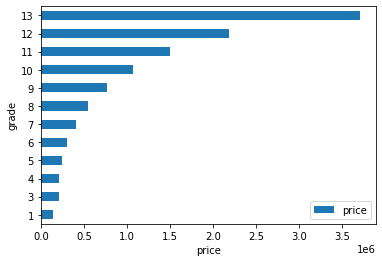

In [3]:
# q.1.b First, use groupby to find the average price for each grade of houses. Then, recreate the following bar plot.

grouped_df = df.groupby("grade").mean().reset_index()
new_table = grouped_df[['grade', 'price']].set_index('grade').plot.barh().set_xlabel("price")


array([[<AxesSubplot:title={'center':'bathrooms'}>]], dtype=object)

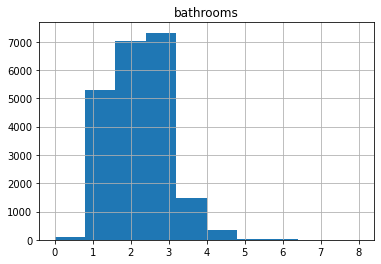

In [4]:
# q.1.c Plot a histogram on “bathrooms”

df.hist(column=["bathrooms"])

In [5]:
# q.1.d Create a correlation matrix.
corr = df.corr()
corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.144608,0.718557


<AxesSubplot:>

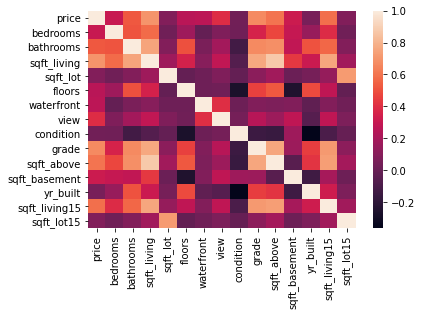

In [6]:
# q.1.d.cont Plot the heatmap from the correltation matrix.
sns.heatmap(corr)

In [7]:
# q.1.e Check for any missing values in the dataframe.
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
# q.1.f Set y = price and all other features to be X. Split your data into training set and testing set.

y = 'price'
drop_price = df.drop(y, axis=1)
y = df['price']
x = drop_price
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [9]:
# q.1.g Set up a LinearRegression Model. Train your model with training set.
model = LinearRegression()
model.fit(Xtrain, ytrain)
LinearRegression()

LinearRegression()

In [10]:
# q.1.h Show the coefficients on all features using model.coef_.
model.coef_

array([-3.75921152e+04,  4.83970468e+04,  1.05957354e+02, -6.83741413e-03,
        2.50731723e+04,  6.12044378e+05,  4.45270574e+04,  1.77175289e+04,
        1.21486981e+05,  5.11463624e+01,  5.48109917e+01, -3.62309255e+03,
        2.43499117e+01, -5.40664123e-01])

In [11]:
# q.1.i Predict housing price using testing data. Compute the root mean squared error of the prediction.
y_pred =  model.predict(Xtest)
mse = mean_squared_error(y_pred, ytest)
error = np.sqrt(mse)
error

216185.47760654907

## Q.2

In [12]:
# q.2 Read in the dataset 'Admission_Predict.csv' and name it 'df'.
df = pd.read_csv("../dataFiles/Admission_Predict.csv")
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

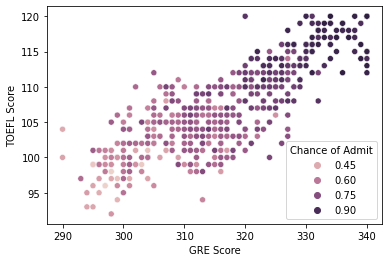

In [13]:
# q.2.a Recreate the following scatter plot where x = “GRE score”, y = “TOEFL score”, hue = “Chance of Admit”.
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score', hue='Chance of Admit')


array([[<AxesSubplot:title={'center':'Chance of Admit'}>]], dtype=object)

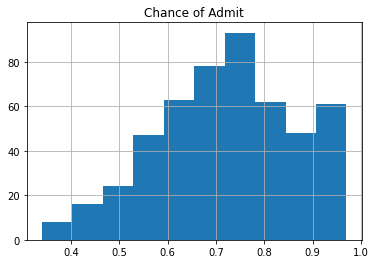

In [14]:
# q.2.b Recreate the following histogram for 'Chance of Admit'
df.hist(column='Chance of Admit')

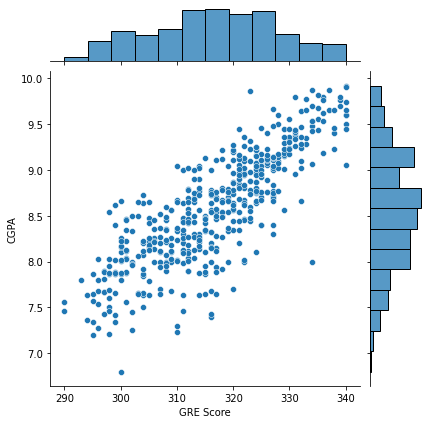

In [15]:
# q.2.c Recreate the following jointplot between x='GRE Score' and y='CGPA'.
sns.jointplot(data=df, x='GRE Score', y='CGPA')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

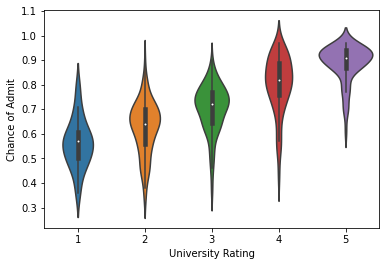

In [16]:
# q.2.d Create a violin plot on 'Chance of Admit' for each group of 'University Rating'.
sns.violinplot(data=df, x='University Rating', y='Chance of Admit')

In [17]:
# q.2.e Create a new datafram, df2, by dropping the 'Chance of Admit' column.
df2 = df.drop('Chance of Admit', axis=1)
df2.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [18]:
# q.2.f In df2, group the data into 3 clusters. Use K-Means clustering.
kmeans = KMeans(n_clusters=3)

In [19]:
# q.2.g In df2, create a new column 'cluster' by predicting the cluster for each row.
kmeans.fit(df2)
cluster = kmeans.predict(df2)

<AxesSubplot:ylabel='Chance of Admit'>

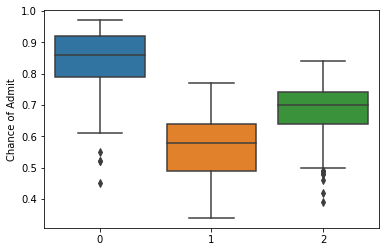

In [20]:
# q.2.h Put the column 'cluster' in the original dataframe, df. Create a boxplot on 'Chance of Admit' for each cluster.
df['cluster'] = cluster
sns.boxplot(data=df,x=cluster,y='Chance of Admit')

#Q.3 
### In this question, you will train a random forest classifier to recognize a digit in an image.

In [21]:
#q.3.a Save the file 'train_32x32.mat' in your working directory. Then, use the following codes to create two arrays, X (the data) and y (the target). 
train_data = io.loadmat('../dataFiles/train_32x32.mat')
X = train_data['X']
y = train_data['y']


C:\Users\jeric\miniconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


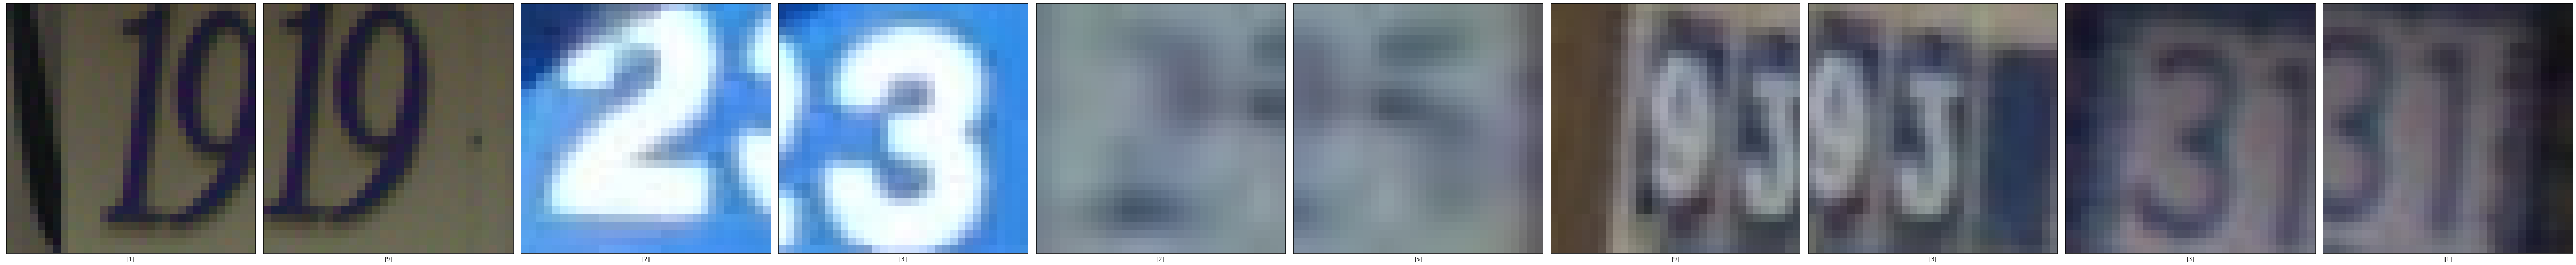

In [22]:
# q.3.b Show the first 10 images. Also, put the corresponding target as the xlabel. 
# Hint: 
#To display image, use
#	ax[i].imshow(X[:,:,:,i])
#To set the xlabel, use
#	ax[i].set(xlabel=y[i])
fig, ax = plt.subplots(1, 10, figsize=(64, 64))

for i, axi in enumerate(ax.flat):
    axi.imshow(X[:, :, :, i])
    axi.set(xlabel=y[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()


In [23]:
# q.3.c Reshape X and y using the following codes
X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2], X.shape[3]).T
y = y.reshape(y.shape[0], )


In [24]:
# q.3.d Split the data into training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
# q.3.e Set up a RandomForestClassifier model and train the model with the training data.
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# q.3.f Making predictions with the testing data. Find the accuracy score.
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7007917007917008